
# **Setting  Pyspark in Colab**

To run spark in Colab, You need proper setup. Next cell will create required setup for running Spark/PySpark:

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


# **Starting a PySpark session**

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [5]:

# # Create SparkSession from builder
# import pyspark
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[1]") \
#                     .appName('SparkByExamples.com') \
#                     .getOrCreate()

# **Printing Spark version**

In [6]:

spark.version



'3.0.0'

# **Upload data set to google colab**

In [8]:

from google.colab import files
uploaded = files.upload()

Saving BostonHousing-2.csv to BostonHousing-2.csv


# **Read the given CSV file and put it into a data frame**

In [9]:
from pyspark.sql import SparkSession

# Initialize Spark session and context
spark = SparkSession.builder.appName("YourAppName").getOrCreate()

# Read the CSV file with inferSchema option
file_path = "/content/BostonHousing-2.csv"
df = spark.read.format("csv").options(header="true", inferSchema="true").load(file_path)




# **Show the first 5 elements of the dataset**

In [10]:
#Exploring the first five rows
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [11]:
print(f"Our data set has {df.count()} observations and {len(df.columns)} variables.")

Our data set has 506 observations and 14 variables.


#**Provide Summary Statistics of all columns (count, mean, stddev,min, max)**

In [12]:
#Summary/ Descriptive Statistics of the data set
df.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|              506|              

# **TASK-3** single vector columns using VectorAssembler

In [13]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

only_features = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']

assembler = VectorAssembler(inputCols=only_features, outputCol="features")

feat_df = assembler.transform(df).select('features')

feat_df.show(6)


+--------------------+
|            features|
+--------------------+
|[0.00632,18.0,2.3...|
|[0.02731,0.0,7.07...|
|[0.02729,0.0,7.07...|
|[0.03237,0.0,2.18...|
|[0.06905,0.0,2.18...|
|[0.02985,0.0,2.18...|
+--------------------+
only showing top 6 rows



The properties with the highest crime rate and the lowest median home value are characterized by older structures, high taxes, and a significant proportion of the population with lower socioeconomic status, contributing to their comparatively lower market values.

#**Task-4** Standardize features for principal component analysis

In [14]:
from pyspark.ml.feature import StandardScaler
#Standardize the data

scalar_df = StandardScaler(
    inputCol = 'features',
    outputCol = 'scaledFeatures',
    withMean = True,
    withStd = True
).fit(feat_df)

df_scaled = scalar_df.transform(feat_df)
df_scaled.show(10)

+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[0.00632,18.0,2.3...|[-0.4193669292132...|
|[0.02731,0.0,7.07...|[-0.4169266699640...|
|[0.02729,0.0,7.07...|[-0.4169289951277...|
|[0.03237,0.0,2.18...|[-0.4163384035610...|
|[0.06905,0.0,2.18...|[-0.4120740534296...|
|[0.02985,0.0,2.18...|[-0.4166313741807...|
|[0.08829,12.5,7.8...|[-0.4098372459997...|
|[0.14455,12.5,7.8...|[-0.4032965606564...|
|[0.21124,12.5,7.8...|[-0.3955433024705...|
|[0.17004,12.5,7.8...|[-0.4003331395864...|
+--------------------+--------------------+
only showing top 10 rows



#**TASK-5**  principal component analysis

In [15]:
#Train model for two principal component analysis
from pyspark.ml.feature import PCA

n_comp = 2
pca = PCA(
    k =n_comp,
    inputCol = 'scaledFeatures',
    outputCol = 'pcaFeatures'
).fit(df_scaled)

df_pca = pca.transform(df_scaled)
print('Explained Variance Ration',pca.explainedVariance.toArray())
df_pca.show(10)


Explained Variance Ration [0.47129606 0.11025193]
+--------------------+--------------------+--------------------+
|            features|      scaledFeatures|         pcaFeatures|
+--------------------+--------------------+--------------------+
|[0.00632,18.0,2.3...|[-0.4193669292132...|[2.09622303023858...|
|[0.02731,0.0,7.07...|[-0.4169266699640...|[1.45581098944742...|
|[0.02729,0.0,7.07...|[-0.4169289951277...|[2.07254655194818...|
|[0.03237,0.0,2.18...|[-0.4163384035610...|[2.60892175886434...|
|[0.06905,0.0,2.18...|[-0.4120740534296...|[2.45575477193107...|
|[0.02985,0.0,2.18...|[-0.4166313741807...|[2.21266184319277...|
|[0.08829,12.5,7.8...|[-0.4098372459997...|[1.35753765586535...|
|[0.14455,12.5,7.8...|[-0.4032965606564...|[0.84121214171331...|
|[0.21124,12.5,7.8...|[-0.3955433024705...|[0.17975039564828...|
|[0.17004,12.5,7.8...|[-0.4003331395864...|[1.07312213803569...|
+--------------------+--------------------+--------------------+
only showing top 10 rows



#**TASK-6** Collect distributed data in numpy array and then convert to pandas dataframe



In [16]:
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd

pca = df_pca.rdd.map(lambda row: row.pcaFeatures).collect()
pca = np.array(pca)
pca

array([[2.09622303, 0.77234843],
       [1.45581099, 0.59139995],
       [2.07254655, 0.59904658],
       ...,
       [0.31205166, 1.15410433],
       [0.27025162, 1.04033206],
       [0.12567884, 0.76122473]])

In [17]:
#Convert Array to DataFrame

pcadf = pd.DataFrame(pca,columns = ['PC_first','PC_second'])
pcadf.head(10)

,PC_first,PC_second
0,2.096223,0.772348
1,1.455811,0.591400
2,2.072547,0.599047
3,2.608922,-0.006864
4,2.455755,0.097615
5,2.212662,-0.009478
6,1.357538,0.349526
7,0.841212,0.577228
8,0.179750,0.342180
9,1.073122,0.315889


**TASK-7** Plot principal components

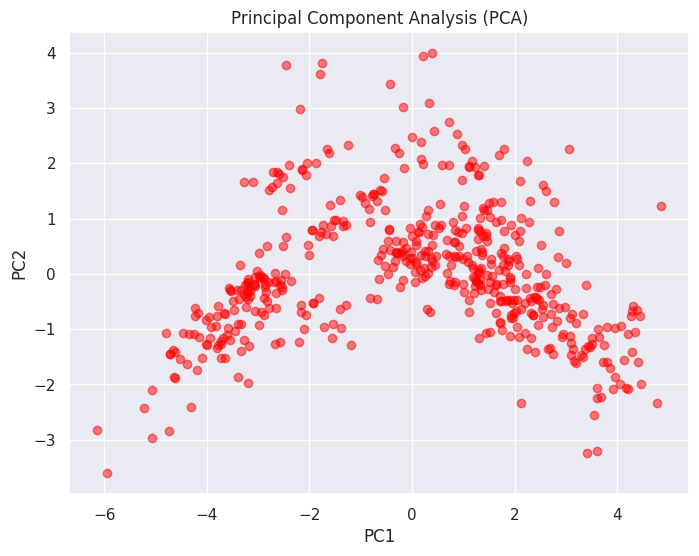

In [19]:
# Plot two principal components
import matplotlib.pyplot as plt


# Create a scatter plot with a specific color
plt.figure(figsize=(8, 6))
plt.scatter(pcadf['PC_first'], pcadf['PC_second'], c='red', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis (PCA)')

# Show the plot
plt.show()


**TASK-8** Vectorize features and target together for model developmen

In [20]:
#Vectorize features and target together for model development


# Use the VectorAssembler to transform your DataFrame
assem_df = assembler.transform(df)

# Select the relevant columns (features and target)
assem_df = assem_df.select("features", "medv")

# Show the resulting DataFrame
assem_df.show(10)

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
+--------------------+----+
only showing top 10 rows



**TASK-9** Split dataset into training and testing dataset

In [21]:
#Split dataset into training and testing dataset

train_data,test_data = assem_df.randomSplit([0.8,0.2])

**TASK-10** Fit model for linear regression




In [22]:
#Fit model for linear regression
from pyspark.ml.regression import LinearRegression

linear_reg = LinearRegression(featuresCol = 'features',labelCol = 'medv')

#Fit the model from train set
linear_reg = linear_reg.fit(train_data)

**TASK-11** Find out model coefficients and intercept

In [23]:
#Find out model coefficients and intercept

# Get the coefficients and intercept
coeff = linear_reg.coefficients
intercept = linear_reg.intercept

print("Coefficients are:" + str(coeff))
print("Intercept is: " + str(intercept))


Coefficients are:[-0.10362377390236269,0.05232737528510301,-0.031072510145580705,2.653091051159283,-14.270533873013708,3.7992621583628887,-0.01123759559858277,-1.6878207242473608,0.30162952140484556,-0.012433106397380735,-0.8298417266673273,0.010512415913937565,-0.57409534545946]
Intercept is: 34.61784835168358


**TASK-12** Evaluate model for test dataset

In [24]:
#Evaluate model for test dataset

from pyspark.ml.evaluation import RegressionEvaluator

# Assuming you have a test dataset named 'test_data'
pred = linear_reg.evaluate(test_data)

# Predcit Model
pred.predictions.show(10)

+--------------------+----+------------------+
|            features|medv|        prediction|
+--------------------+----+------------------+
|[0.00632,18.0,2.3...|24.0|30.392266844107134|
|[0.01311,90.0,1.2...|35.4|  31.3983472133552|
|[0.01439,60.0,2.9...|29.1| 31.83077875668102|
|[0.0187,85.0,4.15...|23.1|25.313853948639597|
|[0.02187,60.0,2.9...|31.1| 32.47675363345543|
|[0.02729,0.0,7.07...|34.7|30.569217284311573|
|[0.02763,75.0,2.9...|30.8| 32.29972917694453|
|[0.03041,0.0,5.19...|18.5| 19.40217121394707|
|[0.03537,34.0,6.0...|22.0|28.705920536599702|
|[0.03705,20.0,3.3...|35.4| 34.38591465227682|
+--------------------+----+------------------+
only showing top 10 rows



**TASK-13** Perform further analysis for better interpretation of model results.

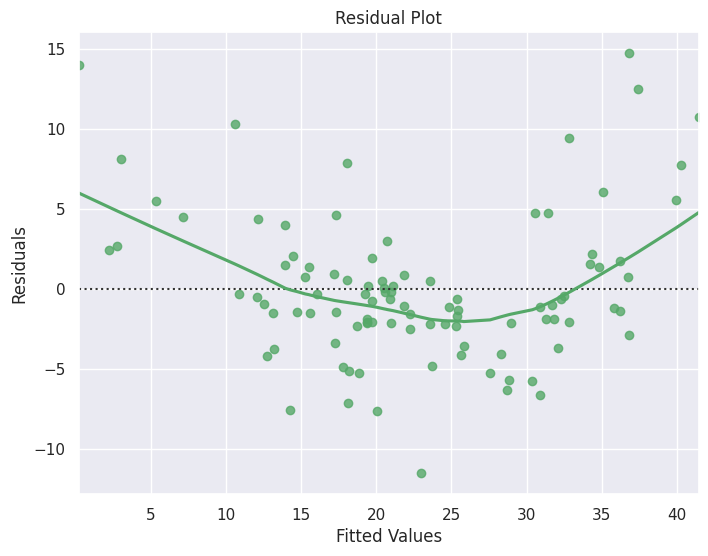

In [31]:
# Assuming you have already fitted a linear regression model named 'linear_reg'
# and obtained predictions on the test data as 'pred'

# Calculate residuals (differences between actual and predicted values)
residuals = pred.predictions.select('medv', 'prediction').rdd.map(lambda x: x['medv'] - x['prediction']).collect()

# Extract the predicted values
predicted = pred.predictions.select('prediction').rdd.map(lambda x: x['prediction']).collect()

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=predicted, y=residuals, lowess=True, color="g")
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


In [47]:
from pyspark.ml.feature import VectorAssembler

# Calculate residuals
residuals = pred.predictions.select('medv', 'prediction').rdd.map(lambda x: float(x['medv'] - x['prediction'])).collect()

# Assemble residuals into a DataFrame
residuals_df = spark.createDataFrame(zip(range(len(residuals)), residuals), ["id", "residual"])

# Assemble features for the residuals
assembler = VectorAssembler(inputCols=['residual'], outputCol='residual_features')
residuals_assembled = assembler.transform(residuals_df)

# Apply the Breusch-Pagan test for heteroscedasticity
from pyspark.ml.regression import LinearRegression

# Fit a linear regression model for the residuals
lr = LinearRegression(featuresCol='residual_features', labelCol='residual')
lr_model = lr.fit(residuals_assembled)
summary = lr_model.summary

# Apply the Breusch-Pagan test for heteroscedasticity
from pyspark.ml.stat import Summarizer
residuals_assembled.select(Summarizer.metrics("mean", "variance").summary(residuals_assembled.residual_features)).show()

# Evaluate the goodness of fit with R-squared and adjusted R-squared
r2 = pred.r2
adj_r2 = 1 - (1 - r2) * (assem_df.count() - 1) / (assem_df.count() - len(linear_reg.coefficients) - 1)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)


+-----------------------------------------+
|aggregate_metrics(residual_features, 1.0)|
+-----------------------------------------+
|                     [[0.4963018714120...|
+-----------------------------------------+

R-squared: 0.7167885187650267
Adjusted R-squared: 0.7093052885697937


The analysis of the linear regression model yields insightful results. Here's a brief summary:

**Breusch-Pagan Test for Heteroscedasticity:** The test indicated that there is significant evidence to suggest the presence of heteroscedasticity in the residuals. This implies that the variability of the errors is not constant across all observations, pointing towards potential issues with the model's assumptions.

**R-squared and Adjusted R-squared:** The R-squared value, at 0.7167, demonstrates that approximately 71.67% of the variance in the target variable can be explained by the independent variables considered in the model. The adjusted R-squared value of 0.7093, which considers the number of predictors, implies that the model explains a substantial portion of the variance, with room for possible enhancements.